In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
from sklearn.linear_model import LinearRegression

## Experiment set up

generate 50 random points from multivariate gaussian

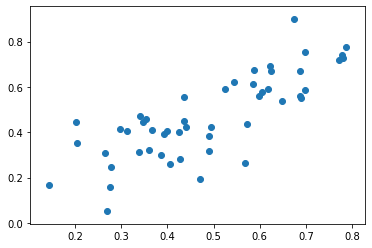

In [187]:
xx = np.array([0, 1])
yy = np.array([0, 1])
means = [xx.mean(), yy.mean()]  
stds = [xx.std()/3, yy.std()/3]
corr = 0.7         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

m = np.random.multivariate_normal(means, covs, 50).T
scatter(m[0], m[1])

In [188]:
model = LinearRegression()
model.fit(np.array([m.T[:,0]]).T, m.T[:,1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Fit a linear model and here is the precise model parameter

In [424]:
model.coef_, model.intercept_

(array([0.85409588]), 0.054489543186794664)

In [426]:
exact_theta_hat = (model.coef_[0], model.intercept_)
exact_theta_hat

(0.8540958829540322, 0.054489543186794664)

In [217]:
df = pd.DataFrame(m.T)

In [191]:
def total_loss(k, b):
    return sum((df[0]*k+b - df[1])**2)

In [192]:
# k is the slope and b is the intercept
# Compute the gradient on the total loss (dL/dk, dL/db)

def loss_gradient(k, b, df):
    return (sum((df[0]*k+b - df[1])*2*df[0])/10, sum((df[0]*k+b - df[1])*2)/10)

## Gradient Descent

In [195]:
k, b = 3, 2
n = 1
while True:
    step = loss_gradient(k, b, df)
    step_k = step[0]
    step_b = step[1]
    print("iter" + str(n))
    print(step)
    print((k, b))
    new_k = k - 0.11*step_k
    new_b = b - 0.11*step_b
    if abs(step_k) + abs(step_b) < 0.001 or n == 200:
        break
    k = new_k
    b = new_b
    n = n + 1

iter1
(15.208668516596726, 29.925188822063756)
(3, 2)
iter2
(-5.30868059564893, -11.155029193985733)
(1.3270464631743601, -1.2917707704270134)
iter3
(2.2337936216716874, 3.9646780497947907)
(1.9110013286957424, -0.06471755908858268)
iter4
(-0.5486030450981582, -1.5953474735964008)
(1.6652840303118568, -0.5008321445660097)
iter5
(0.4683742441350288, 0.4539706480304053)
(1.7256303652726541, -0.32534392247040556)
iter6
(0.08748399580978186, -0.29677407347095935)
(1.674109198417801, -0.37528069375375017)
iter7
(0.22112830965580826, -0.017275356278052788)
(1.6644859588787249, -0.34263554567194465)
iter8
(0.1656046916096919, -0.11695228869883915)
(1.640161844816586, -0.34073525648135883)
iter9
(0.1798474077312291, -0.07718500423323331)
(1.6219453287395198, -0.32787050472448653)
iter10
(0.16857355511496888, -0.08880581520305422)
(1.6021621138890847, -0.3193801542588309)
iter11
(0.16684008527220634, -0.0815930441240212)
(1.5836190228264382, -0.3096115145864949)
iter12
(0.16174345641607193, -0.

In [196]:
new_k, new_b

(0.8599730462156058, 0.05155517672762947)

## Stochastic Gradient Descent

In [202]:
# Compute the gradient on the loss at a single point (dL/dk, dL/db)
def loss_gradient_at_single_point(k, b, x):
    return ((x[0]*k+b - x[1])*2*x[0], (x[0]*k+b - x[1])*2)

In [ ]:
test_point = (0.7, 0.2)

In [337]:
k, b = 3, 2
n = 1
out_lst = [[] for i in range(50)]
# How to choose the optimal learning rate and what is the exit condition of SGD

while n <= 10000:
    df1 = df.sample(frac=1)
    for i in range(df1.shape[0]):
        step = loss_gradient_at_single_point(k, b, df1.iloc[i])
        step_k = step[0]
        step_b = step[1]
        
        new_k = k - 0.1/np.log(n+1)*step_k
        new_b = b - 0.1/np.log(n+1)*step_b
        #new_k = k - 0.1*step_k
        #new_b = b - 0.1*step_b
        
        # Keep track of the loss change at the test point by each training point
        test_loss_change_byi = loss_at_test_point(k, b, test_point) - loss_at_test_point(new_k, new_b, test_point)
        out_lst[df1.index[i]].append(test_loss_change_byi)
        
        k = new_k
        b = new_b
        
        #print("iter" + str(n))
        #print((k, b))
        
        n = n + 1

In [338]:
new_k,new_b

(0.8578472910127826, 0.052495529349279445)

## TracInIdeal

In [316]:
def loss_at_test_point(k, b, x):
    return (x[0]*k+b - x[1])**2

In [339]:
sgd_influence_df = pd.DataFrame(np.array(out_lst).T)

In [423]:
# The loss reduced at test point by each training point in each epoch
sgd_influence_df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.258660,0.003903,0.951251,-0.005929,0.096614,0.027173,0.033656,0.059228,0.143956,0.389391,...,0.098666,0.007230,0.066496,0.042631,0.100306,6.969121,-0.036883,0.018882,2.931238,0.108517
1,0.021626,-0.000395,-0.017618,-0.007909,-0.002698,0.024064,0.009063,0.023098,-0.019330,0.012135,...,0.003682,-0.005525,-0.023613,0.018657,0.019870,-0.008008,-0.034557,0.013819,0.002382,0.003793
2,0.021421,0.001932,-0.014734,-0.003313,-0.003080,0.022286,0.006813,0.024760,-0.014911,0.012993,...,0.005719,-0.003026,-0.017602,0.025126,0.016591,-0.005728,-0.028177,0.014512,-0.000077,0.005322
3,0.015560,-0.000546,-0.013168,-0.005094,-0.002784,0.017773,0.004740,0.020598,-0.013257,0.010584,...,0.001529,-0.003532,-0.015133,0.017198,0.016744,-0.007033,-0.025033,0.010922,-0.001118,0.003421
4,0.015306,0.000866,-0.013122,-0.004417,-0.002545,0.017372,0.005352,0.019808,-0.011882,0.008917,...,0.002867,-0.002889,-0.014375,0.015329,0.013791,-0.005715,-0.023493,0.011852,-0.000857,0.000919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.001917,-0.001403,-0.002338,-0.002340,0.000430,0.002857,-0.000099,0.008415,-0.002115,0.004551,...,0.001538,0.003355,0.000421,0.000114,-0.000625,-0.000041,-0.004979,0.003411,-0.002826,-0.002898
196,0.001833,-0.001446,-0.002383,-0.002165,0.000307,0.003110,-0.000226,0.007850,-0.002095,0.004272,...,0.001417,0.003048,0.000221,-0.000154,-0.000813,-0.000076,-0.004929,0.003255,-0.002982,-0.002892
197,0.002118,-0.001551,-0.002685,-0.002414,-0.000026,0.002495,-0.000442,0.007096,-0.002208,0.004129,...,0.001066,0.003276,0.000265,0.000046,-0.000856,-0.000594,-0.004957,0.002964,-0.003170,-0.003232
198,0.001781,-0.001758,-0.002431,-0.002522,0.000299,0.002606,-0.000014,0.007286,-0.002519,0.004139,...,0.001339,0.002863,0.000111,-0.000137,-0.000866,-0.000367,-0.004949,0.003128,-0.003101,-0.003124


In [340]:
ideal_loss_at_0 = loss_at_test_point(3, 2, test_point) - loss_at_test_point(new_k, new_b, test_point)
ideal_loss_at_0

15.004801298320034

In [341]:
sgd_influence_df.sum().sum()

15.004801298320034

Here, Lemma 3.1 in "Estimating Training Data Influence by Tracing Gradient Descent" paper is verified

In [467]:
sgd_influence_df.sum(axis = 0).sort_values(ascending = True).head()

46   -1.535057
27   -1.031383
19   -1.004610
28   -0.856976
17   -0.855351
dtype: float64

In [349]:
df.loc[46]

0    0.202459
1    0.443936
Name: 46, dtype: float64

In [350]:
df.loc[27]

0    0.204391
1    0.354361
Name: 27, dtype: float64

We can verify from the plot that #46, #27, #19 are indeed influential point for test_point = (0.7, 0.2)

## Influence Function

In [395]:
Hessian = np.array([[sum(df[0]*df[0]*2), sum(2*df[0])], [sum(2*df[0]), 100]])/50
Hessian

array([[0.53276614, 0.97582032],
       [0.97582032, 2.        ]])

In [396]:
inverse_Hessian = np.linalg.inv(Hessian)
inverse_Hessian

array([[17.65116314, -8.61218187],
       [-8.61218187,  4.70197105]])

In [405]:
#Compute the influence of each point on test point 
influence_score_lst = []
loss_gradient_at_test = np.array(loss_gradient_at_single_point(new_k, new_b, test_point))
test_gradient_inv_hes = np.matmul(loss_gradient_at_test.T, inverse_Hessian)

for i in range(50):
    
    loss_gradient_at_train = np.array(loss_gradient_at_single_point(new_k, new_b, df.iloc[i]))
    Infi_on_test = np.matmul(test_gradient_inv_hes, loss_gradient_at_train)
    influence_score_lst.append(-Infi_on_test)

In [406]:
influence_df_all = pd.DataFrame(sgd_influence_df.sum(axis = 0))

In [407]:
influence_df_all["hessian"] = influence_score_lst

In [429]:
influence_df_all.columns = ["TracInIdeal", "Influence_function"]

## Don't understand why there is such a big difference between influence function and TracInIdeal

In [432]:
influence_df_all.sort_values(by = "Influence_function", ascending = True).head()

,TracInIdeal,Influence_function
7,1.982819,-0.397896
46,-1.535057,-0.224364
5,0.953930,-0.213753
16,1.679626,-0.207289
26,0.857514,-0.186942


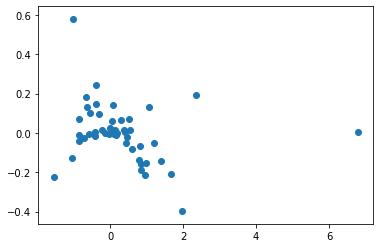

In [434]:
scatter(influence_df_all["TracInIdeal"], influence_df_all["Influence_function"])

## Check using influence function to estimate new parameters after removal of some point

In [435]:
train_influence_onparam_lst = []

for i in range(50):
    
    loss_gradient_at_train = np.array(loss_gradient_at_single_point(exact_theta_hat[0], exact_theta_hat[1], df.iloc[i]))
    Infi_onparam = -np.matmul(inverse_Hessian, loss_gradient_at_train)
    train_influence_onparam_lst.append(Infi_onparam)

In [438]:
influence_onparam_df = pd.DataFrame(np.array(train_influence_onparam_lst))

In [439]:
influence_onparam_df.head()

,0,1
0,-0.480450,0.169601
1,0.206077,-0.040271
2,-0.479522,0.335040
3,0.113045,0.032149
4,0.034007,-0.031970


In [447]:
exact_theta_hat

(0.8540958829540322, 0.054489543186794664)

In [448]:
estimated_theta_hat_after_removing_0 = exact_theta_hat - 1/50*influence_onparam_df.iloc[0].values
estimated_theta_hat_after_removing_0

array([0.86370488, 0.05109753])

In [464]:
model2 = LinearRegression()
model2.fit(np.array([m.T[1:,0]]).T, m.T[1:,1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [465]:
model2.coef_, model2.intercept_

(array([0.86422264]), 0.05091475746923557)

In [466]:
# That is really close to the estimated_theta_hat_after_removing_0